https://www.hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-predict-employee-attrition-rate/

In [ ]:
# !pip install feature-engine

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('dataset/Train.csv')
data.shape

(7000, 24)

In [3]:
data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


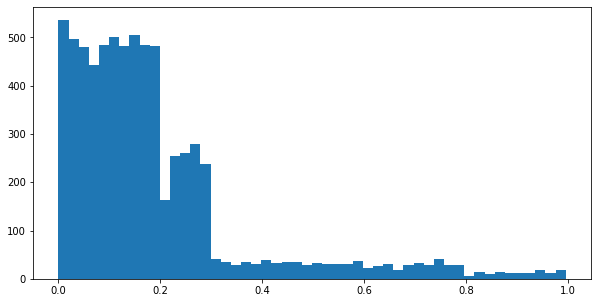

In [4]:
plt.figure(figsize = (10, 5))
plot = plt.hist(data.Attrition_rate, bins = 50)

In [5]:
def train_test_split_ohe(data):
  X = data.drop('Attrition_rate', axis = 1)
  y = data.Attrition_rate.values

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/3, random_state=0)

  ohe = OneHotCategoricalEncoder(drop_last=True)
  X_train = ohe.fit_transform(X_train).values
  X_test = ohe.transform(X_test).values

  return X_train, X_test, y_train, y_test

In [6]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [7]:
def model_training_pred_results(X_train, X_test, y_train, y_test):
  print('LinearRegression')
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  print('MSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
  print('MAE:', mean_absolute_error(y_test, y_pred))
  print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

  print('-'*50)
  print('DecisionTreeRegressor')
  regressor = DecisionTreeRegressor(random_state=0)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  print('MSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
  print('MAE:', mean_absolute_error(y_test, y_pred))
  print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

  print('-'*50)
  print('RandomForestRegressor')
  regressor = RandomForestRegressor(n_estimators = 300, random_state=0, n_jobs = -1)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  print('MSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
  print('MAE:', mean_absolute_error(y_test, y_pred))
  print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

In [8]:
data = data.fillna(data.mean())
data = data.drop(columns = ['Employee_ID'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split_ohe(data)

model_training_pred_results(X_train, X_test, y_train, y_test)

LinearRegression
MSE: 0.18704850851232263
MAE: 0.1267195487892033
MAPE: 476.75554264785
--------------------------------------------------
DecisionTreeRegressor
MSE: 0.27581107256542575
MAE: 0.1889415881176807
MAPE: 569.3265726678466
--------------------------------------------------
RandomForestRegressor
MSE: 0.1897752927621099
MAE: 0.13397871383833643
MAPE: 554.7601852411827
